In [2]:
# 04-17 update
# This version of the program is a beta version for pickle to networkx V1,
# it aims to handle multiple-graph situations in QN, connect the main graph and sub graph,
# In networkx, the sub graph is represented by a single node;
# In pyvis, the sub graph is represented by an individual html, linked with the representing
# node in the future update. 

# part 1 
# basic definition 

import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import pickle
import os

from pyvis.network import Network
from PyQt5.QtCore import QDateTime, Qt, QTimer
from PyQt5.QtWidgets import (QApplication, QCheckBox, QComboBox, QDateTimeEdit,
        QDial, QDialog, QGridLayout, QGroupBox, QHBoxLayout, QLabel, QLineEdit,
        QProgressBar, QPushButton, QRadioButton, QScrollBar, QSizePolicy,
        QSlider, QSpinBox, QStyleFactory, QTableWidget, QTabWidget, QTextEdit,
        QVBoxLayout, QWidget, QToolTip, QTableWidget, QTableWidgetItem)
from PyQt5.QtGui import QIcon, QPixmap
from PyQt5.QtGui import QFont

ImportError: No module named 'pyvis'

In [3]:
fdir = '../database/3d printing/pickle/'
file_list = os.listdir(fdir)
a=pickle.load(open(fdir+'sub1.p','rb'))

ImportError: No module named 'pandas.core.internals.managers'; 'pandas.core.internals' is not a package

In [12]:
# part 2
# import the data pickle version

# this will decide the color map
nwtype = 'empirical_study'#'definition'

# import from the database
# f = open('database/curiosity.p','rb')
fdir = '../database/3d printing/pickle/'

file_list = os.listdir(fdir)
file_index = len(file_list)

# initilize the variable for graph
prepare_list = locals()

# build the individual main graph and sub graph
# index 0: for the main graph
# index from 1: for the sub graph, if exists
for i in range(file_index):
    pickfile=open(fdir+'%s'%file_list[i],'rb')
    mydict = pickle.load(pickfile)
    pickfile.close()
    
    # n_str(i) used for the variable for the networkx construction
    # p_str(i) used for the variable for the pyvis display 
    prepare_list['n_'+str(i)] = nx.Graph()
    prepare_list['p_'+str(i)] = Network(height="100%", width="100%", bgcolor="#222222", font_color="white")
    
    # divde the node and link 
    [dic_node, dic_link] = mydict
    
    # set the color map 
    color_map = []
    rgb_map = []
    title_name = []

    # add nodes into the graph
    (row, col) = dic_node.shape
    for index in range(row):
        nd_id = dic_node.iloc[index]['id']
        nd_content = dic_node.iloc[index]['content']
        nd_feature = dic_node.iloc[index]['feature']
        nd_label = dic_node.iloc[index]['label']
        nd_reference = dic_node.iloc[index]['reference']
        prepare_list['n_'+str(i)].add_node(nd_id,feature=nd_feature,content=nd_content,label=nd_label,reference=nd_reference)
        
        # the default node size
        node_size = 12
        # build the color map 
        if nwtype == 'definition':
            if nd_feature == 'Central question':
                rgb_map.append({'r': 205, 'g': 37, 'b': 38, 'a': 0})
                color_map.append('red')
                node_size = 20
                title_name = nd_label
            elif nd_feature == 'Question':
                rgb_map.append({'r': 205, 'g': 137, 'b': 38, 'a': 0})
                color_map.append('orange')
                node_size = 15
            else:
                rgb_map.append({'r': 144, 'g': 202, 'b': 249, 'a': 0})
                color_map.append('blue')
            
        elif nwtype == 'empirical_study':        
            if nd_feature == 'Central question':
                rgb_map.append({'r': 205, 'g': 37, 'b': 38, 'a': 0})
                color_map.append('red')
                node_size = 20
                title_name = nd_label
            elif nd_feature == 'question':
                rgb_map.append({'r': 205, 'g': 137, 'b': 38, 'a': 0})
                color_map.append('orange')
                node_size = 15
            elif nd_feature == 'answer':
                rgb_map.append({'r': 144, 'g': 202, 'b': 249, 'a': 0})
                color_map.append('blue')
            elif nd_feature == 'Statement':
                rgb_map.append({'r': 199, 'g': 129, 'b': 32, 'a': 0})
                color_map.append('green')
    
        node_color = color_map[-1]
        #     print(color)    
        prepare_list['p_'+str(i)].add_node(nd_label,size = node_size, color = node_color, feature=nd_feature,content=nd_content,reference=nd_reference)
#         print(color_map)
    
    # add links into the graph
    (row, col) = dic_link.shape
    for index in range(row):
        lk_id = dic_link.iloc[index]['id']
        lk_from = dic_link.iloc[index]['start']
        lk_to = dic_link.iloc[index]['end']
        lk_label = dic_link.iloc[index]['label']
        prepare_list['n_'+str(i)].add_edge(lk_from,lk_to,label=lk_label,id_lk=lk_id)
    
    # #     index_from = dic_node.index[dic_node['id']==lk_from].tolist()
    #     index_from = dic_link[dic_link['id']==lk_from].index.values.astype(int)
    # #     index_from = int(index_from)
    #     lk_from_n = dic_node.iloc[index_from]['label']
    # #     index_to = dic_node.index[dic_node['id']==lk_to].tolist()
    #     index_to = dic_link[dic_link['id']==lk_to].index.values
    # #     index_to = int(index_to)
    #     lk_to_n = dic_node.iloc[index_to]['label']
        lk_from_n = dic_node.loc[dic_node['id']==lk_from,'label'].values[0]
        lk_to_n = dic_node.loc[dic_node['id']==lk_to,'label'].values[0]
    
        prepare_list['p_'+str(i)].add_edge(lk_from_n,lk_to_n,label=lk_label)

    #  connect the main graph and subgraph, networkx part 
    if i>0: # sub graph exists
        print(i)
        # name = prepare_list['n_'+str(1)].nodes[0]['id']
        name = []
        for index_id in prepare_list['n_'+str(i)].nodes():
            if prepare_list['n_'+str(i)].nodes[index_id]['feature'] == 'Central question':
                name = prepare_list['n_'+str(i)].node[index_id]['label']

        # delete the original node with same label
        # find the index of the related node, edge 
        id_node = []

        id_edge_start = []
        label_edge_start = []
        id_lk_edge_start = []

        id_edge_end = []
        label_edge_end = []
        id_lk_edge_end = []

        for index_id in prepare_list['n_'+str(0)].nodes():
            if len(prepare_list['n_'+str(0)].nodes[index_id])>1 and prepare_list['n_'+str(0)].nodes[index_id]['label'] == name:
                index = index_id
                id_node.append(index)
        
                # delete the related edge and add new edge
                for index_id in prepare_list['n_'+str(0)].edges():
                    if index_id[0] == index:
                        id_edge_end.append(index_id[1])
                        label_edge_end.append(prepare_list['n_'+str(0)].edges[index_id]['label'])
                        id_lk_edge_end.append(prepare_list['n_'+str(0)].edges[index_id]['id_lk'])
                    if index_id[1] == index:
                        id_edge_start.append(index_id[0])
                        label_edge_start.append(prepare_list['n_'+str(0)].edges[index_id]['label'])
                        id_lk_edge_start.append(prepare_list['n_'+str(0)].edges[index_id]['id_lk'])
                        
        
        # delete the related node
        if len(id_node) == 0:
            print('Please check the original file to make sure the consistency between sub graph and representing node')
        prepare_list['n_'+str(0)].remove_node(id_node[0])

        # add the sub graph as a new node
        prepare_list['n_'+str(0)].add_node(prepare_list['n_'+str(i)],label=name,feature = 'sub graph')

        # add the original edges related with sub graph
        len_edge_start = len(id_edge_start)
        for index in range(len_edge_start):
            prepare_list['n_'+str(0)].add_edge(id_edge_start[index],prepare_list['n_'+str(i)], label=label_edge_start[index],id_lk=id_edge_start[index])
            print(prepare_list['n_'+str(0)].edges(id_edge_start[index],prepare_list['n_'+str(i)]))

        len_edge_end = len(id_edge_end)
        for index in range(len_edge_end):
            prepare_list['n_'+str(0)].add_edge(prepare_list['n_'+str(i)],id_edge_end[index],label=label_edge_end[index],id_lk=id_edge_end[index])
            print(prepare_list['n_'+str(0)].edges(prepare_list['n_'+str(i)],id_edge_end[index]))
        
        # revise the main graph and connect the sub graph, pyvis part
        node_list = prepare_list['p_'+str(0)].get_network_data()[0]
        for node_p in node_list:
            if node_p['label'] == name:
                node_p['color'] = 'yellow' # change the sub graph representing node to yellow
        
# print(len(prepare_list['n_'+str(0)].edges()))
# list(prepare_list['n_'+str(0)].edges())      

ImportError: No module named 'pandas.core.internals.managers'; 'pandas.core.internals' is not a package

d:\anaconda\envs\network\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


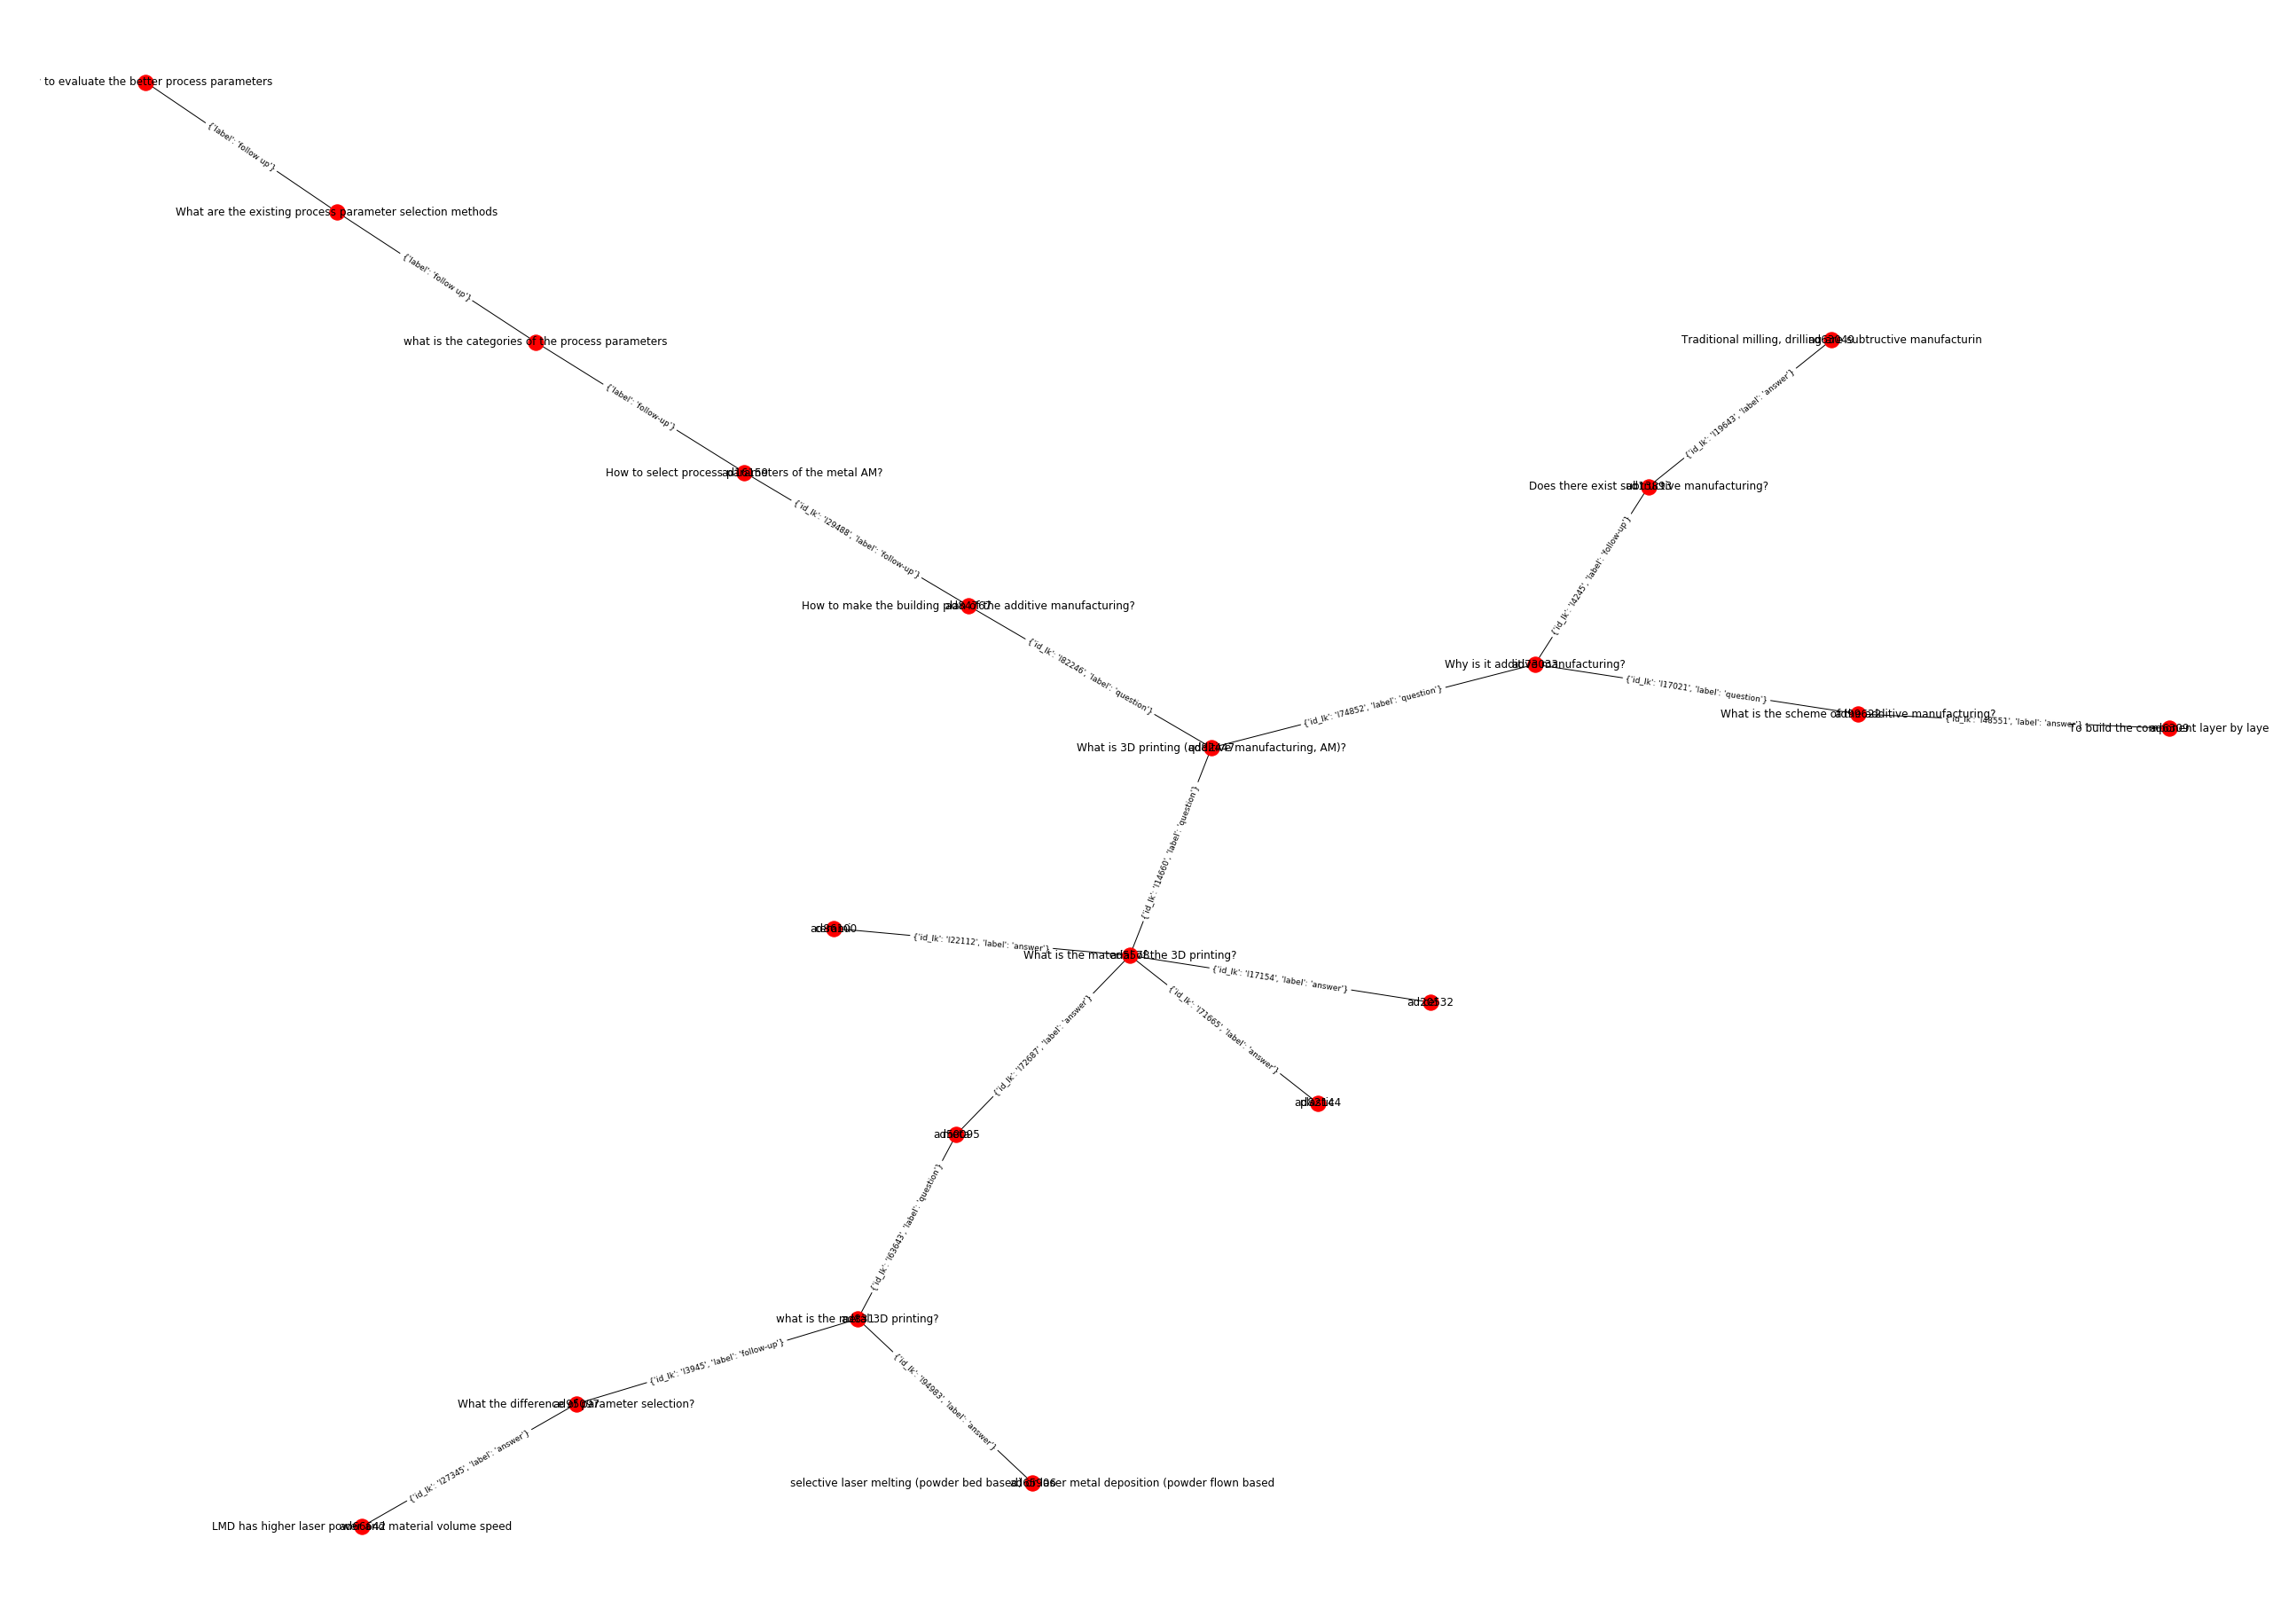

In [24]:
# part 3
# save the networkx as graph and html 

# network version, including simple and full version
fig = plt.figure(frameon=False)
fig.set_size_inches(35, 25) 
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

pos = nx.kamada_kawai_layout(Q)

# nx.draw_networkx(Q,pos,node_color=color_map,arrows=True,arrowstyle='->',arrowsize=25,with_labels=False)
nx.draw_networkx(Q,pos)
node_labels = nx.get_node_attributes(Q,'label')
# nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 24)
edge_labels = nx.get_edge_attributes(Q,'label')
# nx.draw_networkx_edge_labels(Q, pos, labels = edge_labels,font_size = 12)
# nx.draw(Q,with_labels = True,font_weight = 'bold',node_size = 1000,node_color='green',node_shape='h')

# for kn,n in enumerate(Q.node):
#     Q.node[n]['viz']={'color':rgb_map[kn]}
# save and illustration
# fig.savefig('QuestionNet8.png', dpi=100)
# plt.show()

title_name = title_name.replace('?','')
simple = 'QN_simple_' + title_name + '.png'
fig.savefig(simple, dpi=100)
        
# draw the full graph
nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 12)
nx.draw_networkx_edge_labels(Q, pos, labels = edge_labels,font_size = 9)
        
full = 'QN_full_'+ title_name +'.png'
fig.savefig(full, dpi=100)
plt.show()

# generate the html version of the graph
# N = Network(height="100%", width="100%", bgcolor="#222222", font_color="white")

# g.from_nx(N)
N.toggle_drag_nodes(True)
# g.toggle_stabilization(True)
N.toggle_hide_edges_on_drag(False)
N.toggle_hide_nodes_on_drag(True)
N.toggle_physics(True)
N.toggle_stabilization(False)
# EdgeOptions.toggle_smoothness(smooth_type = 'curvedCCW')
N.barnes_hut(gravity=-8000,central_gravity=0.3,spring_length=100,spring_strength=0.001,damping=0.09,overlap=0)
# g.force_atlas_2based(gravity=-50,central_gravity=0.01,spring_length=100,spring_strength=0.08,damping=0.4,overlap=0)
# g.hrepulsion(node_distance=120,central_gravity=0.0,spring_length=100,spring_strength=0.01,damping=0.09)
html = 'QN_html_'+title_name+'.html'
N.show(html)

# generate gephi compatible gexf version of graph
nx.write_gexf(Q,fdir+'QN_%s.gexf'%title_name)

d:\anaconda\envs\network\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


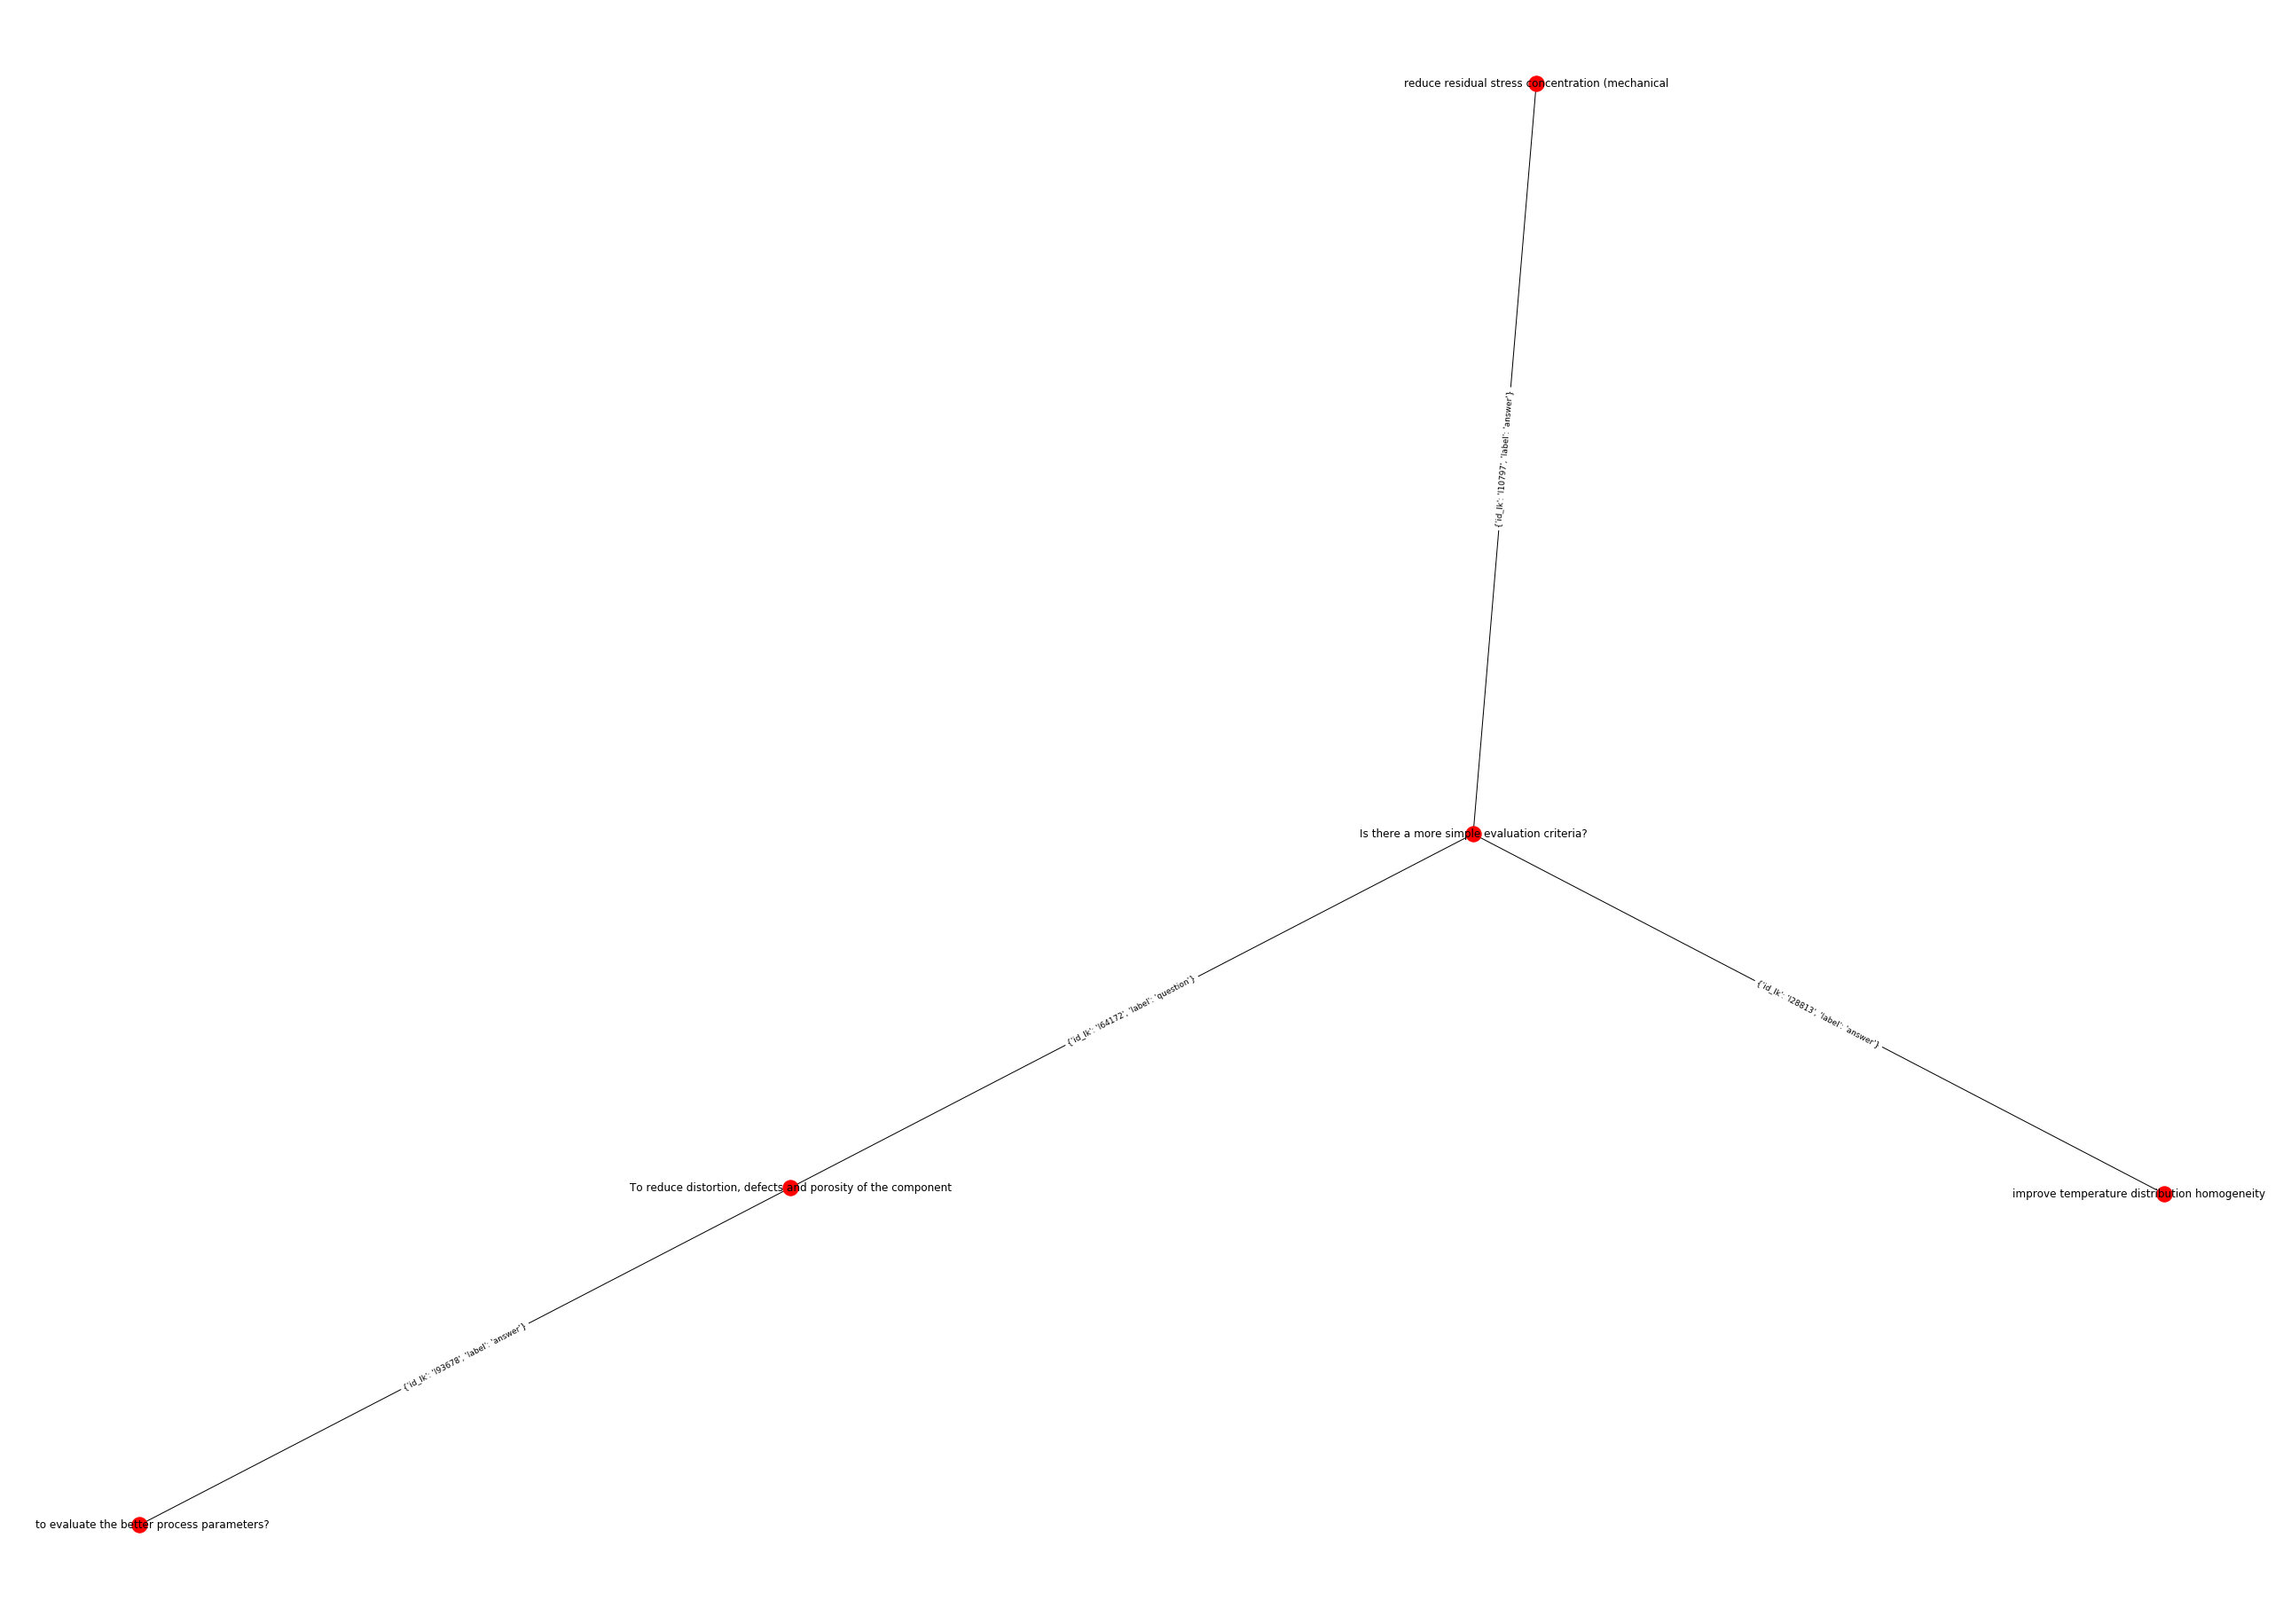

In [28]:
# part 3
# save the networkx as graph and html 

# network version, including simple and full version
fig = plt.figure(frameon=False)
fig.set_size_inches(35, 25) 
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

pos = nx.kamada_kawai_layout(Q3)

nx.draw_networkx(Q3,pos,node_color=color_map3,arrows=True,arrowstyle='->',arrowsize=25,with_labels=False)
# nx.draw_networkx(Q,pos)
node_labels = nx.get_node_attributes(Q3,'label')
# nx.draw_networkx_labels(Q,pos,labels=node_labels,font_size = 24)
edge_labels = nx.get_edge_attributes(Q3,'label')
# nx.draw_networkx_edge_labels(Q, pos, labels = edge_labels,font_size = 12)
# nx.draw(Q,with_labels = True,font_weight = 'bold',node_size = 1000,node_color='green',node_shape='h')

# for kn,n in enumerate(Q.node):
#     Q.node[n]['viz']={'color':rgb_map[kn]}
# save and illustration
# fig.savefig('QuestionNet8.png', dpi=100)
# plt.show()

title_name = title_name.replace('?','')
simple = 'QN_simple_' + title_name + '3.png'
fig.savefig(simple, dpi=100)
        
# draw the full graph
nx.draw_networkx_labels(Q3,pos,labels=node_labels,font_size = 12)
nx.draw_networkx_edge_labels(Q3, pos, labels = edge_labels,font_size = 9)
        
full = 'QN_full_'+ title_name +'3.png'
fig.savefig(full, dpi=100)
plt.show()

# generate the html version of the graph
# N = Network(height="100%", width="100%", bgcolor="#222222", font_color="white")

# g.from_nx(N)
N3.toggle_drag_nodes(True)
# g.toggle_stabilization(True)
N3.toggle_hide_edges_on_drag(False)
N3.toggle_hide_nodes_on_drag(True)
N3.toggle_physics(True)
N3.toggle_stabilization(False)
# EdgeOptions.toggle_smoothness(smooth_type = 'curvedCCW')
N3.barnes_hut(gravity=-8000,central_gravity=0.3,spring_length=100,spring_strength=0.001,damping=0.09,overlap=0)
# g.force_atlas_2based(gravity=-50,central_gravity=0.01,spring_length=100,spring_strength=0.08,damping=0.4,overlap=0)
# g.hrepulsion(node_distance=120,central_gravity=0.0,spring_length=100,spring_strength=0.01,damping=0.09)
html = 'QN_html_'+title_name+'3.html'
N3.show(html)

# # generate gephi compatible gexf version of graph
# nx.write_gexf(Q,fdir+'QN_%s.gexf'%title_name)